In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

from __metode import gradSpustND, racunaj

**Prilagajanje elipse**

Problem linearne regresije lahko razširimo na prilagajanje poljubnih nelienearnih funkcij. Lahko si zamislimo, da želimo izračunati trajektorijo nekega nebesnega telesa, ki se giblje po eliptični orbiti okoli Sonca. 

$$
x = h + a \cos{\theta} \cos{\alpha} - b \sin{\theta} \sin{\alpha} \\
y = k + a \cos{\theta} \sin{\alpha} + b \sin{\theta} \cos{\alpha}
$$

kjer sta $a$ in $b$ pol osi elipse, $h$ in $k$ koordinati središča elipse in $\alpha$ kot za katerega je elipsa rotirana.

In [2]:
a, b = 0.55, 0.49
# a, b = 0.85, 0.29
h, k = 0.12, -0.08
alfa = np.pi*0.125
def elipsa(theta, *args):
    """ Funkcija za računanje rotirane elipse odmaknjena izven izhodišča. """
    par = args[0]
    defPar = [1., 1., 0., 0., 0.]
    m = len(par)
    for i in range(m):
        defPar[i] = par[i]
        if i == 0: defPar[1] = par[0]
    a, b, h, k, alfa = defPar
    x = h + a*np.cos(theta)*np.cos(alfa) - b*np.sin(theta)*np.sin(alfa)
    y = k + a*np.cos(theta)*np.sin(alfa) + b*np.sin(theta)*np.cos(alfa)
    return (x, y)

Zopet bomo za cenovno funkcijo uporabili MSE - povprepčen kvadrat napake. Vendar moramo uporabiti rahel trik. Definirati moramo kako daleč je neka meritev od naše napovedi. To bomo naredili tako:

- za dano vrednost parametrov elipse, bomo generirali točke na naši napovedi elipse,
- nato bomo za vsako meritev izračunali razdaljo do najbližje točke na elipsi,

Za cenovno funkcijo bomo vzeli povprečje kvadratov teh razdalj.

In [3]:
# Generirajmo 100 zašumljenih meritev
n = 100
thetaRange = (0, 2.*np.pi)
m = 100
thetaR = np.linspace(thetaRange[0], thetaRange[1], m)
theta = np.sort(np.random.random(n)*(thetaRange[1]-thetaRange[0])+thetaRange[0])

x, y = elipsa(theta, [a, b, h, k, alfa])
c = 0.1
x = x + c*(np.random.random(n)-0.5)
y = y + c*(np.random.random(n)-0.5)

In [4]:
def MSE(*args):
    """ Mean Squared Error 
    V primeru elipse je uporaba te funkcije malo otežena. 
    Ker za rotirano elipso parametrična spremenljivka theta ne sovpada enako, 
    poiščemo točko, ki se najbolj prilega naši oceni. """
    xt, yt = elipsa(thetaR, *args)
    # POSKUSI in sestavi svojo cenovno funkcijo ter poglej kako se spreminjajo rešitve glede na tvojo mero "optimalnosti"

    # # Oddaljenost meritev od napovedi
    vsota1 = 0.
    for i in range(n):
        vsota1 += np.power( np.amin( np.sqrt( np.power(x[i]-xt, 2.) + np.power(y[i]-yt, 2.) ) ), 2)
    vsota1 /= n
    # # Oddaljenost napovedi od meritev
    # vsota2 = 0.
    # for i in range(m):
    #     vsota2 += np.power( np.amin( np.sqrt( np.power(x-xt[i], 2.) + np.power(y-yt[i], 2.) ) ), 2)
    # vsota2 /= m
    return vsota1 #+ vsota2

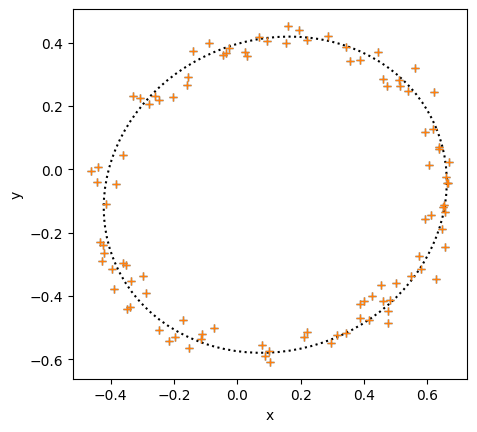

In [5]:
# Risanje grafa podatkov in prilagojenih elips
def initPlot():
    plt.figure()
    plt.plot(x, y, linestyle="", marker="+")
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    xr, yr = elipsa(thetaR, [a, b, h, k, alfa])
    plt.plot(xr, yr, color="k", linestyle=":")
    plt.plot(x, y, linestyle="", marker="+")

initPlot()

In [6]:
def plot(init, color):
    """ Priročna funkcija za hkratno risanje in klicanje metod. """
    # Potek metode do konvergence-----------------------------------------------------------
    sol = racunaj(metoda=gradSpustND, f=MSE, x0=init, par=[0.1, 0.0001], eps=1e-5, konv=True)
    # Risanje
    xg, yg = elipsa(thetaR, sol)
    plt.plot(xg, yg, color=color, linestyle="-")
    # Primer še boljše metode, ki se uporablja v takšnih problemih!
    sc = least_squares(MSE, init)
    # print(sc)
    # Risanje
    xsc, ysc = elipsa(thetaR, sc.x)
    plt.plot(xsc, ysc, color=color, linestyle="--")

[0.5377703] 0.011053920263218792 21
[ 0.54870639  0.49205232  0.10348467 -0.07750155  0.00394335] 0.0013373608140694144 47


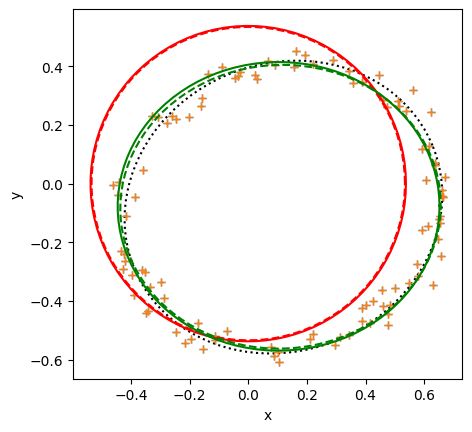

In [7]:
# POSKUSI zagnati kakšno metodo več pod drugačnimi pogoji! (glej zakomentirane primere)
# Oglej si kakšne rezultate dobiš pri različnem številu parametrov, ki jih želimo optimizirati
# Npr. če vzamemo samo 1 parameter bomo iskali krog, ki se najbolje prilega podatkom!
initPlot()
plot([1.], "red")
plot([1., 1., 0., 0., 0.], "green")

# Prikaz grafov
plt.show()